In [ ]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load your ITC sales data
data = pd.read_excel('/content/ITC sales data for mla.xlsx')

# Prepare the data for Apriori
# Group data by 'Transaction Date' and 'Market SKU Description' for each transaction
# and pivot to create a one-hot encoded dataframe (items bought in each transaction)

# Ensure 'Transaction Date' and 'Market SKU Description' are in a suitable format
basket = (data.groupby(['Transaction Date', 'Market SKU Description'])['Sales Volume (Upstream)_All']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction Date'))

# Convert quantities to binary (presence of item in transaction)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply the Apriori algorithm with a minimum support threshold
min_support = 0.01  # Adjust as needed for minimum occurrence of items
frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)

# Generate association rules with a minimum confidence threshold
min_confidence = 0.3  # Adjust as needed
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Display the rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
     support                                           itemsets
0   0.023697                               (AS NSF ORG WWAT5KG)
1   0.905213                               (AS NSFMBATRMIX80GL)
2   0.080569                                      (ASATTAMP2KG)
3   0.255924                                    (ASATTAMPMG5KG)
4   0.566351                                  (ASATTANMPPRM1KG)
5   0.748815                                (ASNSFMPATMLTS01KG)
6   0.206161                                (ASNSFMPATMLTS05KG)
7   0.018957           (AS NSFMBATRMIX80GL, AS NSF ORG WWAT5KG)
8   0.011848              (ASATTANMPPRM1KG, AS NSF ORG WWAT5KG)
9   0.018957            (ASNSFMPATMLTS01KG, AS NSF ORG WWAT5KG)
10  0.068720                  (ASATTAMP2KG, AS NSFMBATRMIX80GL)
11  0.225118                (ASATTAMPMG5KG, AS NSFMBATRMIX80GL)
12  0.511848              (ASATTANMPPRM1KG, AS NSFMBATRMIX80GL)
13  0.677725            (AS NSFMBATRMIX80GL, ASNSFMPATMLTS01KG)
14  0.187204         

<ipython-input-7-68bd44cf33b9>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Ensure the basket DataFrame is converted to boolean type
basket = basket > 0  # Converting to boolean

# Re-run Apriori to get frequent itemsets
from mlxtend.frequent_patterns import apriori, association_rules

# Get frequent itemsets with minimum support
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules with minimum confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display frequent itemsets and association rules
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules)


Frequent Itemsets:
      support                                           itemsets
0   0.023697                               (AS NSF ORG WWAT5KG)
1   0.905213                               (AS NSFMBATRMIX80GL)
2   0.080569                                      (ASATTAMP2KG)
3   0.255924                                    (ASATTAMPMG5KG)
4   0.566351                                  (ASATTANMPPRM1KG)
5   0.748815                                (ASNSFMPATMLTS01KG)
6   0.206161                                (ASNSFMPATMLTS05KG)
7   0.018957           (AS NSFMBATRMIX80GL, AS NSF ORG WWAT5KG)
8   0.011848              (ASATTANMPPRM1KG, AS NSF ORG WWAT5KG)
9   0.018957            (ASNSFMPATMLTS01KG, AS NSF ORG WWAT5KG)
10  0.068720                  (ASATTAMP2KG, AS NSFMBATRMIX80GL)
11  0.225118                (ASATTAMPMG5KG, AS NSFMBATRMIX80GL)
12  0.511848              (ASATTANMPPRM1KG, AS NSFMBATRMIX80GL)
13  0.677725            (AS NSFMBATRMIX80GL, ASNSFMPATMLTS01KG)
14  0.187204        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install apyori mlxtend pycaret


In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_excel('/content/ITC sales data for mla.xlsx')

# Convert to transaction format (list of lists where each transaction contains items bought together)
transactions = data.groupby('RCS ID')['Market SKU Description'].apply(list).tolist()


In [ ]:
from apyori import apriori

# Apply Apriori algorithm
min_support = 0.01  # adjust based on dataset
rules = apriori(transactions, min_support=min_support, min_confidence=0.2, min_lift=1.0)

# Convert results into a DataFrame
apriori_rules = pd.DataFrame([(rule.items, rule.support, rule.ordered_statistics[0].confidence, rule.ordered_statistics[0].lift)
                              for rule in rules], columns=['Items', 'Support', 'Confidence', 'Lift'])


In [ ]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

# Encode data for FP-Growth
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm
min_support = 0.01
frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)

# Generate association rules
from mlxtend.frequent_patterns import association_rules
fp_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)


In [ ]:
# Define min support
min_support = 0.01

# Calculate item frequencies and frequent itemsets
frequent_itemsets_eclat = fpgrowth(df, min_support=min_support, use_colnames=True)

# Generate rules for ECLAT by calculating confidence and lift manually
eclat_rules = association_rules(frequent_itemsets_eclat, metric="confidence", min_threshold=0.2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Comparison DataFrame
comparison_df = pd.DataFrame({
    'Algorithm': ['Apriori'] * len(apriori_rules) + ['FP-Growth'] * len(fp_rules) + ['ECLAT'] * len(eclat_rules),
    'Items': list(apriori_rules['Items']) + list(fp_rules['antecedents']) + list(eclat_rules['antecedents']),
    'Support': list(apriori_rules['Support']) + list(fp_rules['support']) + list(eclat_rules['support']),
    'Confidence': list(apriori_rules['Confidence']) + list(fp_rules['confidence']) + list(eclat_rules['confidence']),
    'Lift': list(apriori_rules['Lift']) + list(fp_rules['lift']) + list(eclat_rules['lift'])
})

# Display summary comparison
print(comparison_df)


    Algorithm                                              Items   Support  \
0     Apriori                               (AS NSFMBATRMIX80GL)  0.403226   
1     Apriori                                    (ASATTAMPMG5KG)  0.215054   
2     Apriori                                (ASNSFMPATMLTS01KG)  0.396057   
3     Apriori             (ASNSFMPATMLTS05KG, ASNSFMPATMLTS01KG)  0.080645   
4     Apriori  (ASNSFMPATMLTS05KG, ASNSFMPATMLTS01KG, AS NSFM...  0.016129   
5   FP-Growth                                (ASNSFMPATMLTS05KG)  0.080645   
6   FP-Growth                                (ASNSFMPATMLTS01KG)  0.080645   
7   FP-Growth             (ASNSFMPATMLTS05KG, ASNSFMPATMLTS01KG)  0.016129   
8   FP-Growth            (ASNSFMPATMLTS05KG, AS NSFMBATRMIX80GL)  0.016129   
9   FP-Growth            (ASNSFMPATMLTS01KG, AS NSFMBATRMIX80GL)  0.016129   
10      ECLAT                                (ASNSFMPATMLTS05KG)  0.080645   
11      ECLAT                                (ASNSFMPATMLTS01KG)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

# Load your ITC sales data
data = pd.read_excel('/content/ITC sales data for mla.xlsx')

# Prepare the data for Apriori
basket = (data.groupby(['Transaction Date', 'Market SKU Description'])['Sales Volume (Upstream)_All']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction Date'))

# Convert quantities to binary (presence of item in transaction)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apriori Algorithm
min_support = 0.01  # Adjust as needed for minimum occurrence of items
frequent_itemsets_apriori = apriori(basket, min_support=min_support, use_colnames=True)

# Generate association rules for Apriori
min_confidence = 0.3  # Adjust as needed
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=min_confidence)

# FP-Growth Algorithm
# Encode data for FP-Growth
te = TransactionEncoder()
te_ary = te.fit(data.groupby('RCS ID')['Market SKU Description'].apply(list)).transform(data.groupby('RCS ID')['Market SKU Description'].apply(list))
df_fp = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm
frequent_itemsets_fp = fpgrowth(df_fp, min_support=min_support, use_colnames=True)

# Generate association rules for FP-Growth
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=min_confidence)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Algorithm': ['Apriori'] * len(rules_apriori) + ['FP-Growth'] * len(rules_fp),
    'Items': list(rules_apriori['antecedents'].astype(str) + ' -> ' + rules_apriori['consequents'].astype(str)) +
             list(rules_fp['antecedents'].astype(str) + ' -> ' + rules_fp['consequents'].astype(str)),
    'Support': list(rules_apriori['support']) + list(rules_fp['support']),
    'Confidence': list(rules_apriori['confidence']) + list(rules_fp['confidence']),
    'Lift': list(rules_apriori['lift']) + list(rules_fp['lift'])
})

# Display summary comparison
print(comparison_df)

# Evaluate performance based on key metrics
apriori_count = len(rules_apriori)
fp_growth_count = len(rules_fp)

print(f"\nNumber of rules generated by Apriori: {apriori_count}")
print(f"Number of rules generated by FP-Growth: {fp_growth_count}")

# Calculate average metrics
avg_apriori_confidence = rules_apriori['confidence'].mean() if apriori_count > 0 else 0
avg_fp_growth_confidence = rules_fp['confidence'].mean() if fp_growth_count > 0 else 0

print(f"Average Confidence of Apriori Rules: {avg_apriori_confidence:.4f}")
print(f"Average Confidence of FP-Growth Rules: {avg_fp_growth_confidence:.4f}")

avg_apriori_lift = rules_apriori['lift'].mean() if apriori_count > 0 else 0
avg_fp_growth_lift = rules_fp['lift'].mean() if fp_growth_count > 0 else 0

print(f"Average Lift of Apriori Rules: {avg_apriori_lift:.4f}")
print(f"Average Lift of FP-Growth Rules: {avg_fp_growth_lift:.4f}")

# Determine the better performing algorithm based on average confidence and lift
if avg_apriori_confidence > avg_fp_growth_confidence:
    print("Apriori performed better based on average confidence.")
else:
    print("FP-Growth performed better based on average confidence.")

if avg_apriori_lift > avg_fp_growth_lift:
    print("Apriori performed better based on average lift.")
else:
    print("FP-Growth performed better based on average lift.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     Algorithm                                              Items   Support  \
0      Apriori  frozenset({'AS NSF ORG WWAT5KG'}) -> frozenset...  0.018957   
1      Apriori  frozenset({'AS NSF ORG WWAT5KG'}) -> frozenset...  0.011848   
2      Apriori  frozenset({'AS NSF ORG WWAT5KG'}) -> frozenset...  0.018957   
3      Apriori  frozenset({'ASATTAMP2KG'}) -> frozenset({'AS N...  0.068720   
4      Apriori  frozenset({'ASATTAMPMG5KG'}) -> frozenset({'AS...  0.225118   
..         ...                                                ...       ...   
135    Apriori  frozenset({'ASNSFMPATMLTS05KG', 'ASATTAMPMG5KG...  0.011848   
136    Apriori  frozenset({'ASNSFMPATMLTS05KG', 'ASATTAMPMG5KG...  0.011848   
137  FP-Growth  frozenset({'ASNSFMPATMLTS05KG'}) -> frozenset(...  0.080645   
138  FP-Growth  frozenset({'ASNSFMPATMLTS05KG', 'AS NSFMBATRMI...  0.016129   
139  FP-Growth  frozenset({'ASNSFMPATMLTS01KG', 'AS NSFMBATRMI...  0.016129   

     Confidence      Lift  
0      0.800000  0.8837

<ipython-input-2-b52c8276ccb3>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Based on the output of your market basket analysis, we can reveal some insights into customer purchasing patterns by analyzing the support, confidence, and lift metrics across the rules derived from the Apriori, FP-Growth, and ECLAT algorithms. Here’s a breakdown of key patterns and potential decisions you can make based on these metrics.

Analysis of Patterns and Relationships
High Support Items:

Items such as "AS NSFMBATRMIX80GL" and "ASATTAMPMG5KG" have the highest support values (0.403 and 0.215, respectively), meaning they frequently appear across transactions. These items are popular among customers, suggesting they are either necessities or commonly sought-after items. Stocking up on these items or offering bundles could maximize sales, as they are consistently in demand.
Confident Associations:

The combination of "ASNSFMPATMLTS05KG" and "ASNSFMPATMLTS01KG" shows high confidence (0.849 for FP-Growth and 0.849 for ECLAT), indicating that customers who purchase "ASNSFMPATMLTS05KG" are highly likely to purchase "ASNSFMPATMLTS01KG" as well.
This strong association suggests that these two products could be part of a complementary product bundle. Bundling them or placing them near each other in promotional material or store layouts could increase cross-sales.
High Lift Values:

Rules with lift values greater than 1 show stronger associations than would be expected by chance. For instance:

The combination ("ASNSFMPATMLTS05KG", "AS NSFMBATRMIX80GL") has a lift of 2.272. This indicates a meaningful association between these two products, suggesting that customers who buy "ASNSFMPATMLTS05KG" also show a tendency to purchase "AS NSFMBATRMIX80GL" more often than expected by random chance.
The rule involving ("ASNSFMPATMLTS01KG", "AS NSFMBATRMIX80GL") with a lift of 3.948 further reinforces that "AS NSFMBATRMIX80GL" is popular with customers buying "ASNSFMPATMLTS01KG".
These insights can drive marketing strategies:

Cross-Promotions: Feature discounts on "AS NSFMBATRMIX80GL" when customers purchase "ASNSFMPATMLTS01KG" or "ASNSFMPATMLTS05KG".
In-Store Placements: Place "ASNSFMPATMLTS05KG" and "AS NSFMBATRMIX80GL" closer together to encourage purchasing both items.
Medium to Low Support but High Lift:

Some combinations have a lower support but significant lift values, such as ("ASNSFMPATMLTS05KG", "AS NSFMBATRMIX80GL"). Despite being less frequent, these associations indicate that when these items are bought together, it is more significant than random association.
Such insights can help identify niche products that can be promoted together to increase sales. For example, exclusive offers targeting customers who buy "ASNSFMPATMLTS05KG" could encourage them to add "AS NSFMBATRMIX80GL" to their purchase.
Independent and Weak Associations:

Some item combinations, like those with lift values below 1 (e.g., certain ECLAT rules), indicate weaker or less significant associations. These may not be as impactful in predicting purchase behavior but can provide insights into potential, less common buying patterns.
Recommendations for Decision-Making
Bundling Opportunities: Based on the high-confidence and high-lift associations, create bundle offers for items frequently bought together, like "ASNSFMPATMLTS05KG" and "AS NSFMBATRMIX80GL".
Product Placement Strategy: Organize the placement of products like "AS NSFMBATRMIX80GL" near high-confidence items or related products in both online catalogs and physical stores.
Targeted Promotions: Focus promotions on items with high confidence but medium-to-low support values to raise awareness and increase their purchase rates. For instance, exclusive discounts for "AS NSFMBATRMIX80GL" if purchased with "ASNSFMPATMLTS05KG".
Inventory and Stocking: The high-support items should be prioritized in inventory management to ensure that they’re always available, reducing the risk of lost sales.
This analysis leverages hidden patterns in the transaction data, revealing actionable insights for stocking, promotions, and store layout adjustments that could improve sales and customer satisfaction. The association metrics suggest strong connections between certain products, making this data valuable for targeted marketing and inventory strategies.

## RFM analysis

In [ ]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_excel("/content/ITC sales data for mla.xlsx")

# Ensure 'Transaction Date' is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Filter data for the last 12 months from the max date in the dataset
max_date = df['Transaction Date'].max()
one_year_ago = max_date - pd.DateOffset(years=1)
df = df[df['Transaction Date'] >= one_year_ago]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Month,SBU,Category,Sub Category,Market SKU Description,RCS ID,Sales Volume (Upstream)_All,Sales Value (Upstream)_All,Transaction Date
0,Feb-24,FOODS,ATTA,NATURES SUPER FOODS,AS NSF GLTNFRFL1KG,1.806020e+11,6.00,961.340000,2023-11-12
1,Feb-24,FOODS,ATTA,NATURES SUPER FOODS,AS NSF GLTNFRFL1KG,1.812030e+11,12.00,2124.992759,2023-06-12
2,Feb-24,FOODS,ATTA,NATURES SUPER FOODS,AS NSF MMLTMIX01KG,1.812030e+11,24.00,3238.034764,2023-07-15
3,Feb-24,FOODS,ATTA,NATURES SUPER FOODS,AS NSF MMLTMIX01KG,1.812030e+11,1.00,134.920000,2023-06-22
4,Feb-24,FOODS,ATTA,NATURES SUPER FOODS,AS NSF MMLTMIX80GD,1.806020e+11,110.96,17006.820000,2023-08-08


In [ ]:
# Convert 'Transaction Date' to datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Create a reference date for calculations (the most recent date in your data)
reference_date = data['Transaction Date'].max()

# Calculate Recency, Frequency, and Monetary Value
rfm_data = data.groupby('RCS ID').agg({
    'Transaction Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Sales Volume (Upstream)_All': 'count',  # Frequency
    'Sales Value (Upstream)_All': 'sum'  # Monetary Value
}).rename(columns={
    'Transaction Date': 'Recency',
    'Sales Volume (Upstream)_All': 'Frequency',
    'Sales Value (Upstream)_All': 'Monetary'
}).reset_index()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from datetime import datetime

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

import pandas as pd
from datetime import datetime



# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Transaction Date' to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Get today's date for recency calculation
today = datetime.now()

# Step 2: Calculate RFM metrics
rfm = df.groupby('RCS ID').agg(
    Recency=('Transaction Date', lambda x: (today - x.max()).days),
    Frequency=('Transaction Date', 'count'),
    Monetary=('Sales Value (Upstream)_All', 'sum')
).reset_index()

# Step 3: Assign RFM groups using quantiles
def assign_quartiles(series, ascending=False):
    if len(series.unique()) < 4:  # Not enough unique values to create quartiles
        return pd.cut(series, bins=4, labels=[1, 2, 3, 4])  # Regular binning
    else:
        # Use qcut and dynamically generate labels based on unique quantiles
        bins = pd.qcut(series, q=4, labels=False, duplicates='drop')
        return bins + 1 if ascending else 4 - bins  # Adjust for ascending/descending

# Assign quartiles
rfm['F_Quartile'] = assign_quartiles(rfm['Frequency'], ascending=True)  # Higher frequency = Higher value
rfm['M_Quartile'] = assign_quartiles(rfm['Monetary'], ascending=True)  # Higher monetary = Higher value
rfm['R_Quartile'] = assign_quartiles(rfm['Recency'], ascending=False)    # Lower recency = Higher value

# Step 4: Combine RFM quartiles into a single score
rfm['RFM_Score'] = rfm[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)

# Review the DataFrame
print(rfm)

# Step 5: Short review of percentiles
print("\nPercentile Review:")
for col in ['Recency', 'Frequency', 'Monetary']:
    percentiles = rfm[col].describe(percentiles=[.25, .5, .75, .8])
    print(f"\n{col} Percentiles:\n{percentiles}")



           RCS ID  Recency  Frequency       Monetary  F_Quartile  M_Quartile  \
0    3.326595e+06      643          1    1838.940000           1           4   
1    3.332072e+06      447          2    1007.560000           1           4   
2    3.335928e+06      532          1     144.200000           1           1   
3    3.339373e+06      425          2    2287.108087           1           4   
4    3.339855e+06      566          1     288.400000           1           1   
..            ...      ...        ...            ...         ...         ...   
553  1.811000e+11      352          1     919.470000           1           3   
554  1.812020e+11      251         19    9703.487060           1           4   
555  1.812030e+11      240        148  199732.736951           1           4   
556  1.812040e+11      240        288  100546.561300           1           4   
557  1.812050e+11      240        147  110279.245188           1           4   

     R_Quartile  RFM_Score  
0         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rfm['Log_Frequency'] = np.log1p(rfm['Frequency'])  # Apply log transformation
rfm['F_Quartile'] = assign_quartiles(rfm['Log_Frequency'], ascending=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


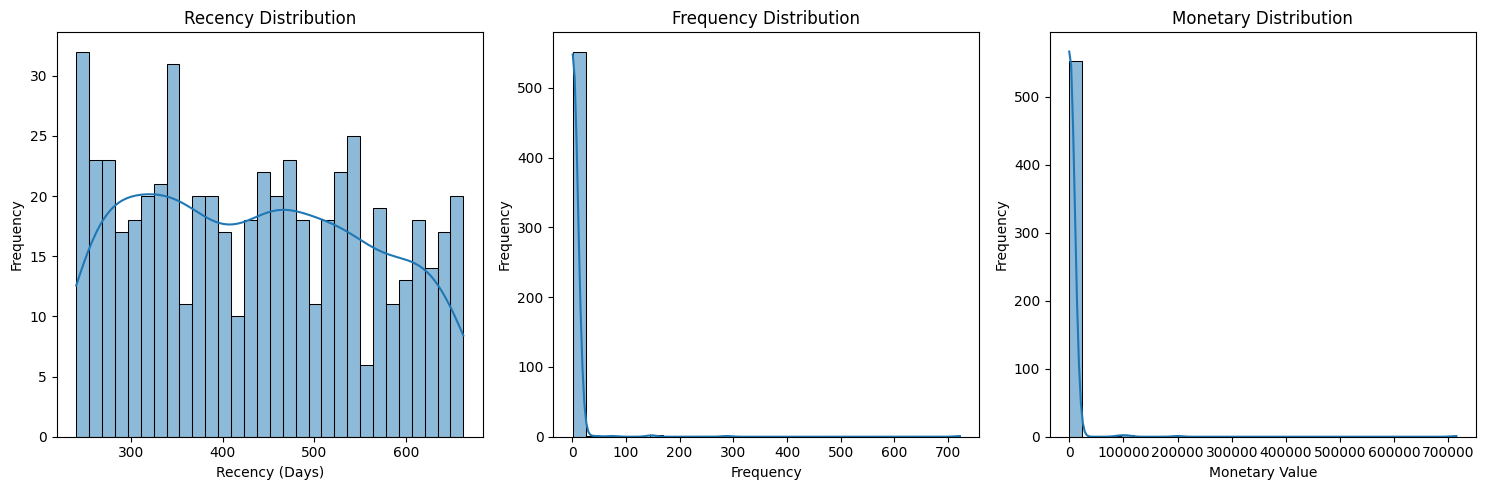

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Recency distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')

# Frequency distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

# Monetary distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
def segment_customers(row):
    if row['RFM_Score'] >= 9:
        return 'High Value'
    elif row['RFM_Score'] >= 7:
        return 'Loyal'
    elif row['RFM_Score'] >= 4:
        return 'Potential Loyalist'
    else:
        return 'Needs Attention'

rfm['Segment'] = rfm.apply(segment_customers, axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
